In [1]:
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv('/content/sample_data/train.csv')
df.head()


,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


# **Handling null values**

In [2]:
df = df.replace(" ", np.nan)

In [3]:
df.isnull().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53        2570
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [4]:
df = df.drop(['s53', 's54', 's55', 's56', 's57', 's59', 's69'], axis = 1)
df.shape

(28322, 29)

In [5]:
df["s52"] = df["s52"].replace("l", 1)
df["s52"] = df["s52"].replace("o", 0)
df["s52"] = df["s52"].replace("1", 1)
df["s52"] = df["s52"].replace("0", 0)

In [6]:
df.iloc[112]

id        b'gAAAAABinOiXKqKXjYJoWc9_eAyV8vAfuJx0dtGSg658...
gender                                                    M
s11                                                       Y
s12                                                       Y
s13                                                       1
s16                                                       D
s17                                                       D
s18                                                       B
s48                                                       0
s52                                                       0
s58                                                       B
s70                                                   op: D
s71                                                       b
n1                                                 3.874432
n2                                                  0.94412
n3                                                        3
n4                                      

In [7]:
df.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,1,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0
5,b'gAAAAABinOiWbgAxe8Uy9tboiJGZEYK7zcGy6fv8_5Ao...,M,Y,Y,1,D,C,B,1,1,...,-8.885964,1.845862,10.660651,11.704121,1.568647,0,0,0.687640,6,0
6,b'gAAAAABinOiYFRgmHZu5sLaAYKtwJbRhPnjCYPVxQPNf...,M,Y,Y,1,B,D,B,1,1,...,-8.818020,1.535369,8.155031,11.555441,1.543350,0,0,0.983840,5,1
7,b'gAAAAABinOiXQjg5rjPZsHSAQrJhP8u_21fwETW89EFN...,M,Y,Y,1,B,C,B,0,1,...,-9.249317,1.811164,2.822841,6.590523,1.694829,0,0,0.777798,0,0
8,b'gAAAAABinOic9rpK09lv7Q2k7bMbzXsT0ZluA8SfT7x0...,F,Y,Y,1,D,D,B,0,1,...,-9.042350,1.510002,10.661686,11.276986,1.779480,0,0,0.557019,0,0
9,b'gAAAAABinOiWr-5MKlXYJ9hkIMYLh2XNHJeYWIIpt94I...,M,Y,N,1,D,D,B,0,1,...,-9.326015,1.383908,2.671842,3.940305,1.716165,0,0,0.212874,1,0


# **Encoding Object type values**

In [8]:
df.dtypes

id         object
gender     object
s11        object
s12        object
s13         int64
s16        object
s17        object
s18        object
s48         int64
s52         int64
s58        object
s70        object
s71        object
n1        float64
n2        float64
n3          int64
n4        float64
n5        float64
n6        float64
n7        float64
n8        float64
n9        float64
n10       float64
n11       float64
n12         int64
n13         int64
n14       float64
n15         int64
label       int64
dtype: object

In [9]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['gender'] = enc.fit_transform(df['gender'])

print(df[['gender']].head())

   gender
0       1
1       1
2       1
3       0
4       1


In [11]:
df["s11"].unique()

array(['Y', 'N'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['s11'] = enc.fit_transform(df['s11'])

print(df[['s11']].head())

   s11
0    1
1    1
2    1
3    1
4    0


In [13]:
df["s12"].unique()

array(['N', 'Y'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['s12'] = enc.fit_transform(df['s12'])

print(df[['s12']].head())

   s12
0    0
1    1
2    1
3    1
4    1


In [15]:
df["s16"].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [16]:
df['s16'] = df['s16'].map({'A':0, 'B':1, 'C':2, 'D':3}) 
print(df[['s16']].head())

   s16
0    3
1    3
2    3
3    3
4    1


In [17]:
df["s17"].unique()

array(['D', 'C', 'B', 'A'], dtype=object)

In [18]:
df['s17'] = df['s17'].map({'A':0, 'B':1, 'C':2, 'D':3}) 
print(df[['s17']].head())

   s17
0    3
1    3
2    3
3    3
4    3


In [19]:
df["s18"].unique()

array(['B', 'D', 'C', 'A'], dtype=object)

In [20]:
df['s18'] = df['s18'].map({'A':0, 'B':1, 'C':2, 'D':3}) 
print(df[['s18']].head())

   s18
0    1
1    1
2    1
3    1
4    3


In [21]:
df["s58"].unique()

array(['B', 'A'], dtype=object)

In [22]:
df['s58'] = df['s58'].map({'A':0, 'B':1}) 
print(df[['s58']].head())

   s58
0    1
1    1
2    1
3    1
4    1


In [23]:
df["s70"].unique()

array(['op: D', 'op: C', 'op: B', 'op: A'], dtype=object)

In [24]:
df['s70'] = df['s70'].map({'op: A':0, 'op: B':1, 'op: C':2, 'op: D':3}) 
print(df[['s70']].head())

   s70
0    3
1    3
2    3
3    3
4    3


In [25]:
df["s71"].unique()

array(['b', 'd', 'c', 'a'], dtype=object)

In [26]:
df['s71'] = df['s71'].map({'a':0, 'b':1, 'c':2, 'd':3}) 
print(df[['s71']].head())

   s71
0    1
1    1
2    1
3    1
4    3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  int64  
 2   s11     28322 non-null  int64  
 3   s12     28322 non-null  int64  
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  int64  
 6   s17     28322 non-null  int64  
 7   s18     28322 non-null  int64  
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  int64  
 10  s58     28322 non-null  int64  
 11  s70     28322 non-null  int64  
 12  s71     28322 non-null  int64  
 13  n1      28322 non-null  float64
 14  n2      28322 non-null  float64
 15  n3      28322 non-null  int64  
 16  n4      28322 non-null  float64
 17  n5      28322 non-null  float64
 18  n6      28322 non-null  float64
 19  n7      28322 non-null  float64
 20  n8      28322 non-null  float64
 21  n9      28322 non-null  float64
 22

# **Correlation**

In [28]:
sample_df = df.drop(columns = "label")
sample_df = pd.DataFrame(sample_df)
df_corr = sample_df.corr().abs()
df_corr

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
gender,1.000000,0.175986,0.008275,0.071908,0.276221,0.091490,0.166208,0.229131,0.015093,0.001367,...,0.001879,0.048931,0.098827,0.073935,0.017454,0.011116,0.014391,0.001771,0.011282,0.005253
s11,0.175986,1.000000,0.122604,0.152894,0.312280,0.024321,0.378104,0.227235,0.048722,0.000146,...,0.002684,0.107899,0.069586,0.008499,0.059767,0.001172,0.004395,0.008851,0.008947,0.004480
s12,0.008275,0.122604,1.000000,0.030485,0.114807,0.020279,0.083345,0.111740,0.022399,0.007549,...,0.046553,0.104793,0.018563,0.048050,0.148752,0.000980,0.003955,0.008978,0.001485,0.003488
s13,0.071908,0.152894,0.030485,1.000000,0.175418,0.070349,0.235607,0.107237,0.022049,0.000727,...,0.094815,0.044618,0.064532,0.029764,0.035100,0.014183,0.002139,0.006929,0.000816,0.003288
s16,0.276221,0.312280,0.114807,0.175418,1.000000,0.228227,0.435997,0.279743,0.007695,0.004679,...,0.134311,0.085090,0.124558,0.028635,0.083651,0.004407,0.006248,0.006489,0.004451,0.004337
s17,0.091490,0.024321,0.020279,0.070349,0.228227,1.000000,0.128551,0.126755,0.001650,0.004773,...,0.077112,0.006095,0.081026,0.035924,0.012660,0.002339,0.008923,0.002034,0.008191,0.002795
s18,0.166208,0.378104,0.083345,0.235607,0.435997,0.128551,1.000000,0.177686,0.053767,0.004686,...,0.150570,0.116548,0.052599,0.006537,0.105692,0.010269,0.014171,0.008232,0.001344,0.001508
s48,0.229131,0.227235,0.111740,0.107237,0.279743,0.126755,0.177686,1.000000,0.016405,0.002680,...,0.116692,0.026812,0.010002,0.092835,0.055772,0.000968,0.003127,0.003117,0.005858,0.008473
s52,0.015093,0.048722,0.022399,0.022049,0.007695,0.001650,0.053767,0.016405,1.000000,0.009627,...,0.042912,0.101875,0.054252,0.064231,0.081445,0.003483,0.008700,0.013325,0.002834,0.004463
s58,0.001367,0.000146,0.007549,0.000727,0.004679,0.004773,0.004686,0.002680,0.009627,1.000000,...,0.007552,0.007867,0.002210,0.005528,0.005295,0.003889,0.004456,0.004879,0.001413,0.003263


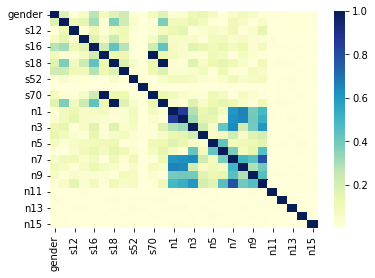

In [29]:
import seaborn as sns
sns.heatmap(df_corr, cmap = 'YlGnBu')

In [30]:
upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))
print(upper_tri)

        gender       s11       s12       s13       s16       s17       s18  \
gender     NaN  0.175986  0.008275  0.071908  0.276221  0.091490  0.166208   
s11        NaN       NaN  0.122604  0.152894  0.312280  0.024321  0.378104   
s12        NaN       NaN       NaN  0.030485  0.114807  0.020279  0.083345   
s13        NaN       NaN       NaN       NaN  0.175418  0.070349  0.235607   
s16        NaN       NaN       NaN       NaN       NaN  0.228227  0.435997   
s17        NaN       NaN       NaN       NaN       NaN       NaN  0.128551   
s18        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s48        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s52        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s58        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s70        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
s71        NaN       NaN       NaN       NaN       NaN       NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [31]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['s70', 's71']


In [32]:
df = df.drop(to_drop, axis=1)
# sample_df.head()

# **ML Algorithm**

In [33]:
from sklearn.model_selection import train_test_split
y = df['label']
x = df.drop(columns = ['label', 'id'])

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25, random_state=42)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# scaler.fit(x_train)

In [ ]:
# X_train_scaled = scaler.transform(x_train)

# **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8110436379042508


# **random forest**

In [36]:
from sklearn import ensemble
rf_classifer = ensemble.RandomForestClassifier(n_estimators=100)
rf_classifer.fit(x_train, y_train)
y_pred = rf_classifer.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8736054229628584


# **Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred = nb_classifier.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8477616155910183


# **Naive Bayes Hypertuning**

In [57]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB, cv=3, verbose=1, scoring='accuracy') 
gs_NB.fit(x_train, y_train)


y_pred = gs_NB.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.8606129077813868


# **MLP**

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500, activation='logistic')
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8676740573365344


# **GradientBooster**

In [40]:
gb_classfier = ensemble.GradientBoostingClassifier()
gb_classfier.fit(x_train, y_train)
y_pred = gb_classfier.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8760062138116085


# **LogisticRegression**

In [45]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=5000)
lr_classifier.fit(x_train, y_train)
y_pred = lr_classifier.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8709221861319023


# **Support Vector Machine**

In [47]:
from sklearn.svm import SVC
SV_classifier = SVC(probability=True, kernel='linear')
SV_classifier.fit(x_train, y_train)
y_pred = SV_classifier.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8618839147013134


# **Adaboost**

In [49]:
from sklearn.ensemble import AdaBoostClassifier
AdaModel = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
model = AdaModel.fit(x_train, y_train)
y_pred = model.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8712046321141081


# **classifiers with adaboost**

In [50]:
adabc = AdaBoostClassifier(n_estimators = 150, base_estimator = nb_classifier, learning_rate = 1)
ada = adabc.fit(x_train, y_train)
y_pred = ada.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.15675752012427624


In [53]:
adabc = AdaBoostClassifier(n_estimators = 150, base_estimator = lr_classifier, learning_rate = 1)
ada = adabc.fit(x_train, y_train)
y_pred = ada.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8673916113543285
